In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('suicide_data.csv')
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df[['sex','age','population']].head(5)

,sex,age,population
0,male,15-24 years,312900
1,male,35-54 years,308000
2,female,15-24 years,289700
3,male,75+ years,21800
4,male,25-34 years,274300


In [4]:
#lets start with data cleaning process
# age has years appended to it. Lets trim years from age using regex pattern


df['age_group']=df['age'].str.replace(r'\s*years', '', regex=True)
df['age_group']

0        15-24
1        35-54
2        15-24
3          75+
4        25-34
         ...  
27815    35-54
27816      75+
27817     5-14
27818     5-14
27819    55-74
Name: age_group, Length: 27820, dtype: object

In [5]:
# splittling country-year to only country

df['country']=df['country-year'].str[0:-4]
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

[Text(0, 0, '4642'),
 Text(0, 0, '4642'),
 Text(0, 0, '4642'),
 Text(0, 0, '4642'),
 Text(0, 0, '4642'),
 Text(0, 0, '4610')]

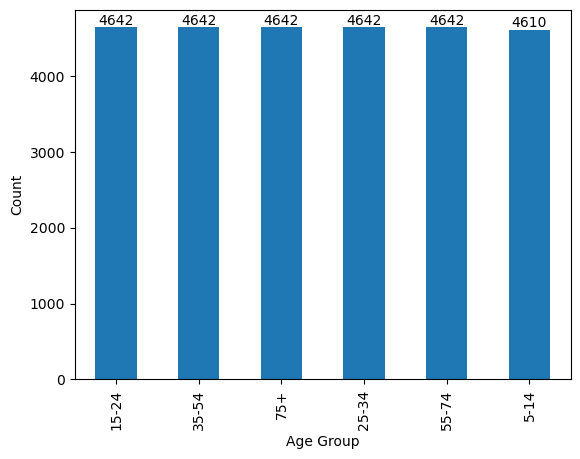

In [6]:
#the data is cleaned. Lets start visualizing by plotting graphs
# Lets see the count of age group 
ax=df['age_group'].value_counts()
a=ax.plot(kind='bar')
x=a.set_xlabel('Age Group')
y=a.set_ylabel('Count')
a.bar_label(a.containers[0],label_type='edge')

In [7]:
# seems the count of age group are almost same count

In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [9]:
# Rename column
df=df.rename(columns={'sex':'Gender','suicides_no':'suicides_count'})
df

,country,year,Gender,age,suicides_count,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,age_group
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,15-24
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,35-54
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,15-24
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,75+
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,35-54
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,75+
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,5-14
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,5-14


In [10]:
# lets plot male and female count of suicide rate
df.Gender.unique()

array(['male', 'female'], dtype=object)

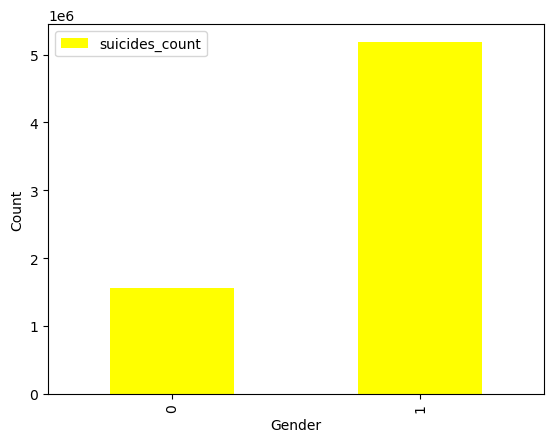

In [11]:
# ax=df.Gender.value_counts()
ax = df.groupby('Gender')['suicides_count'].sum().reset_index()
ax
pt=ax.plot(kind='bar',color='yellow')
a=pt.set_xlabel('Gender')
b=pt.set_ylabel('Count')


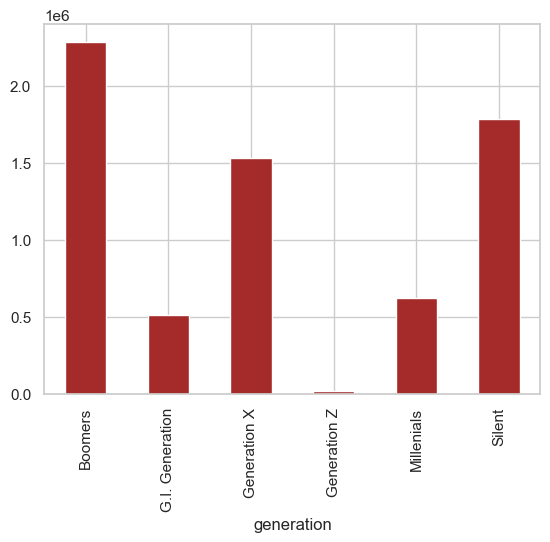

In [69]:
gen_count=df['generation'].value_counts()
suicide_gen = df.groupby(['generation']).suicides_count.sum()
ax=suicide_gen.plot(kind='bar',color='brown')

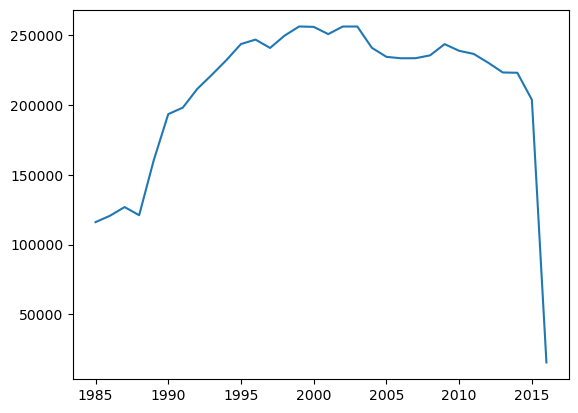

In [13]:
# plotting the suicide count over the span of years
grouped_df = df.groupby('year')['suicides_count'].sum().reset_index()
x=grouped_df['year']
y=grouped_df['suicides_count']
a=plt.plot(x,y)

In [14]:
df['country'].value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [15]:
df.isnull().any()

country               False
year                  False
Gender                False
age                   False
suicides_count        False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
age_group             False
dtype: bool

In [16]:
df['HDI for year'].isnull().sum()

19456

In [17]:
# 19456 records are null for HDI for Year column. Dropping this column.
df.drop(columns=['HDI for year'])

,country,year,Gender,age,suicides_count,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,age_group
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,15-24
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,35-54
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,15-24
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,75+
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X,35-54
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent,75+
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z,5-14
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z,5-14


In [18]:
year_count=df.groupby(['country'])['suicides_count'].sum()
year_count

country
Albania                    1970
Antigua and Barbuda          11
Argentina                 82219
Armenia                    1905
Aruba                       101
                         ...   
United Arab Emirates        622
United Kingdom           136805
United States           1034013
Uruguay                   13138
Uzbekistan                34803
Name: suicides_count, Length: 101, dtype: int64

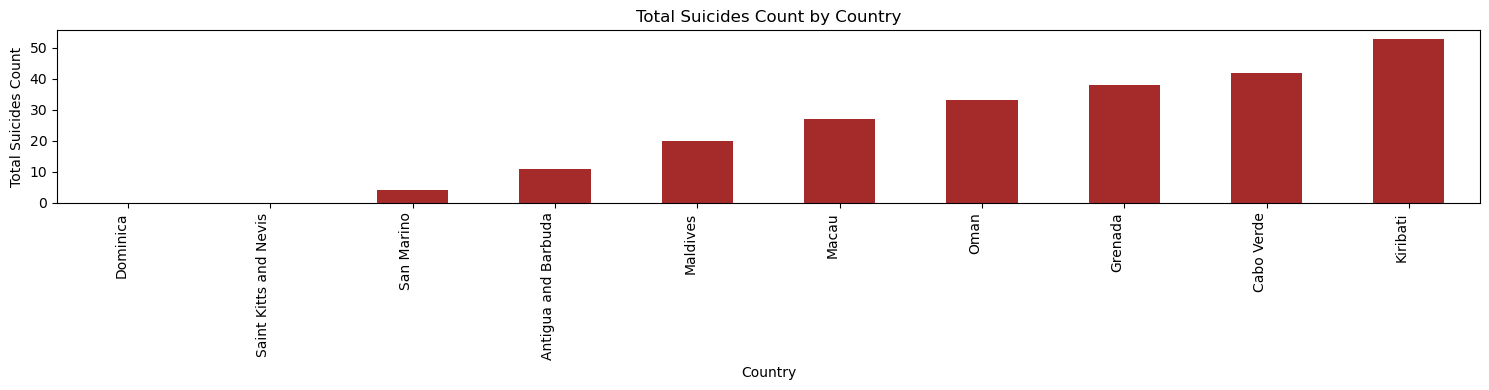

In [19]:
plt.figure(figsize=[15,4])
year_count=df.groupby(['country'])['suicides_count'].sum()
sorted=year_count.sort_values().head(10)
bar=sorted.plot(kind="bar",color="brown")
plt.xlabel('Country')
plt.ylabel('Total Suicides Count')
plt.title('Total Suicides Count by Country')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

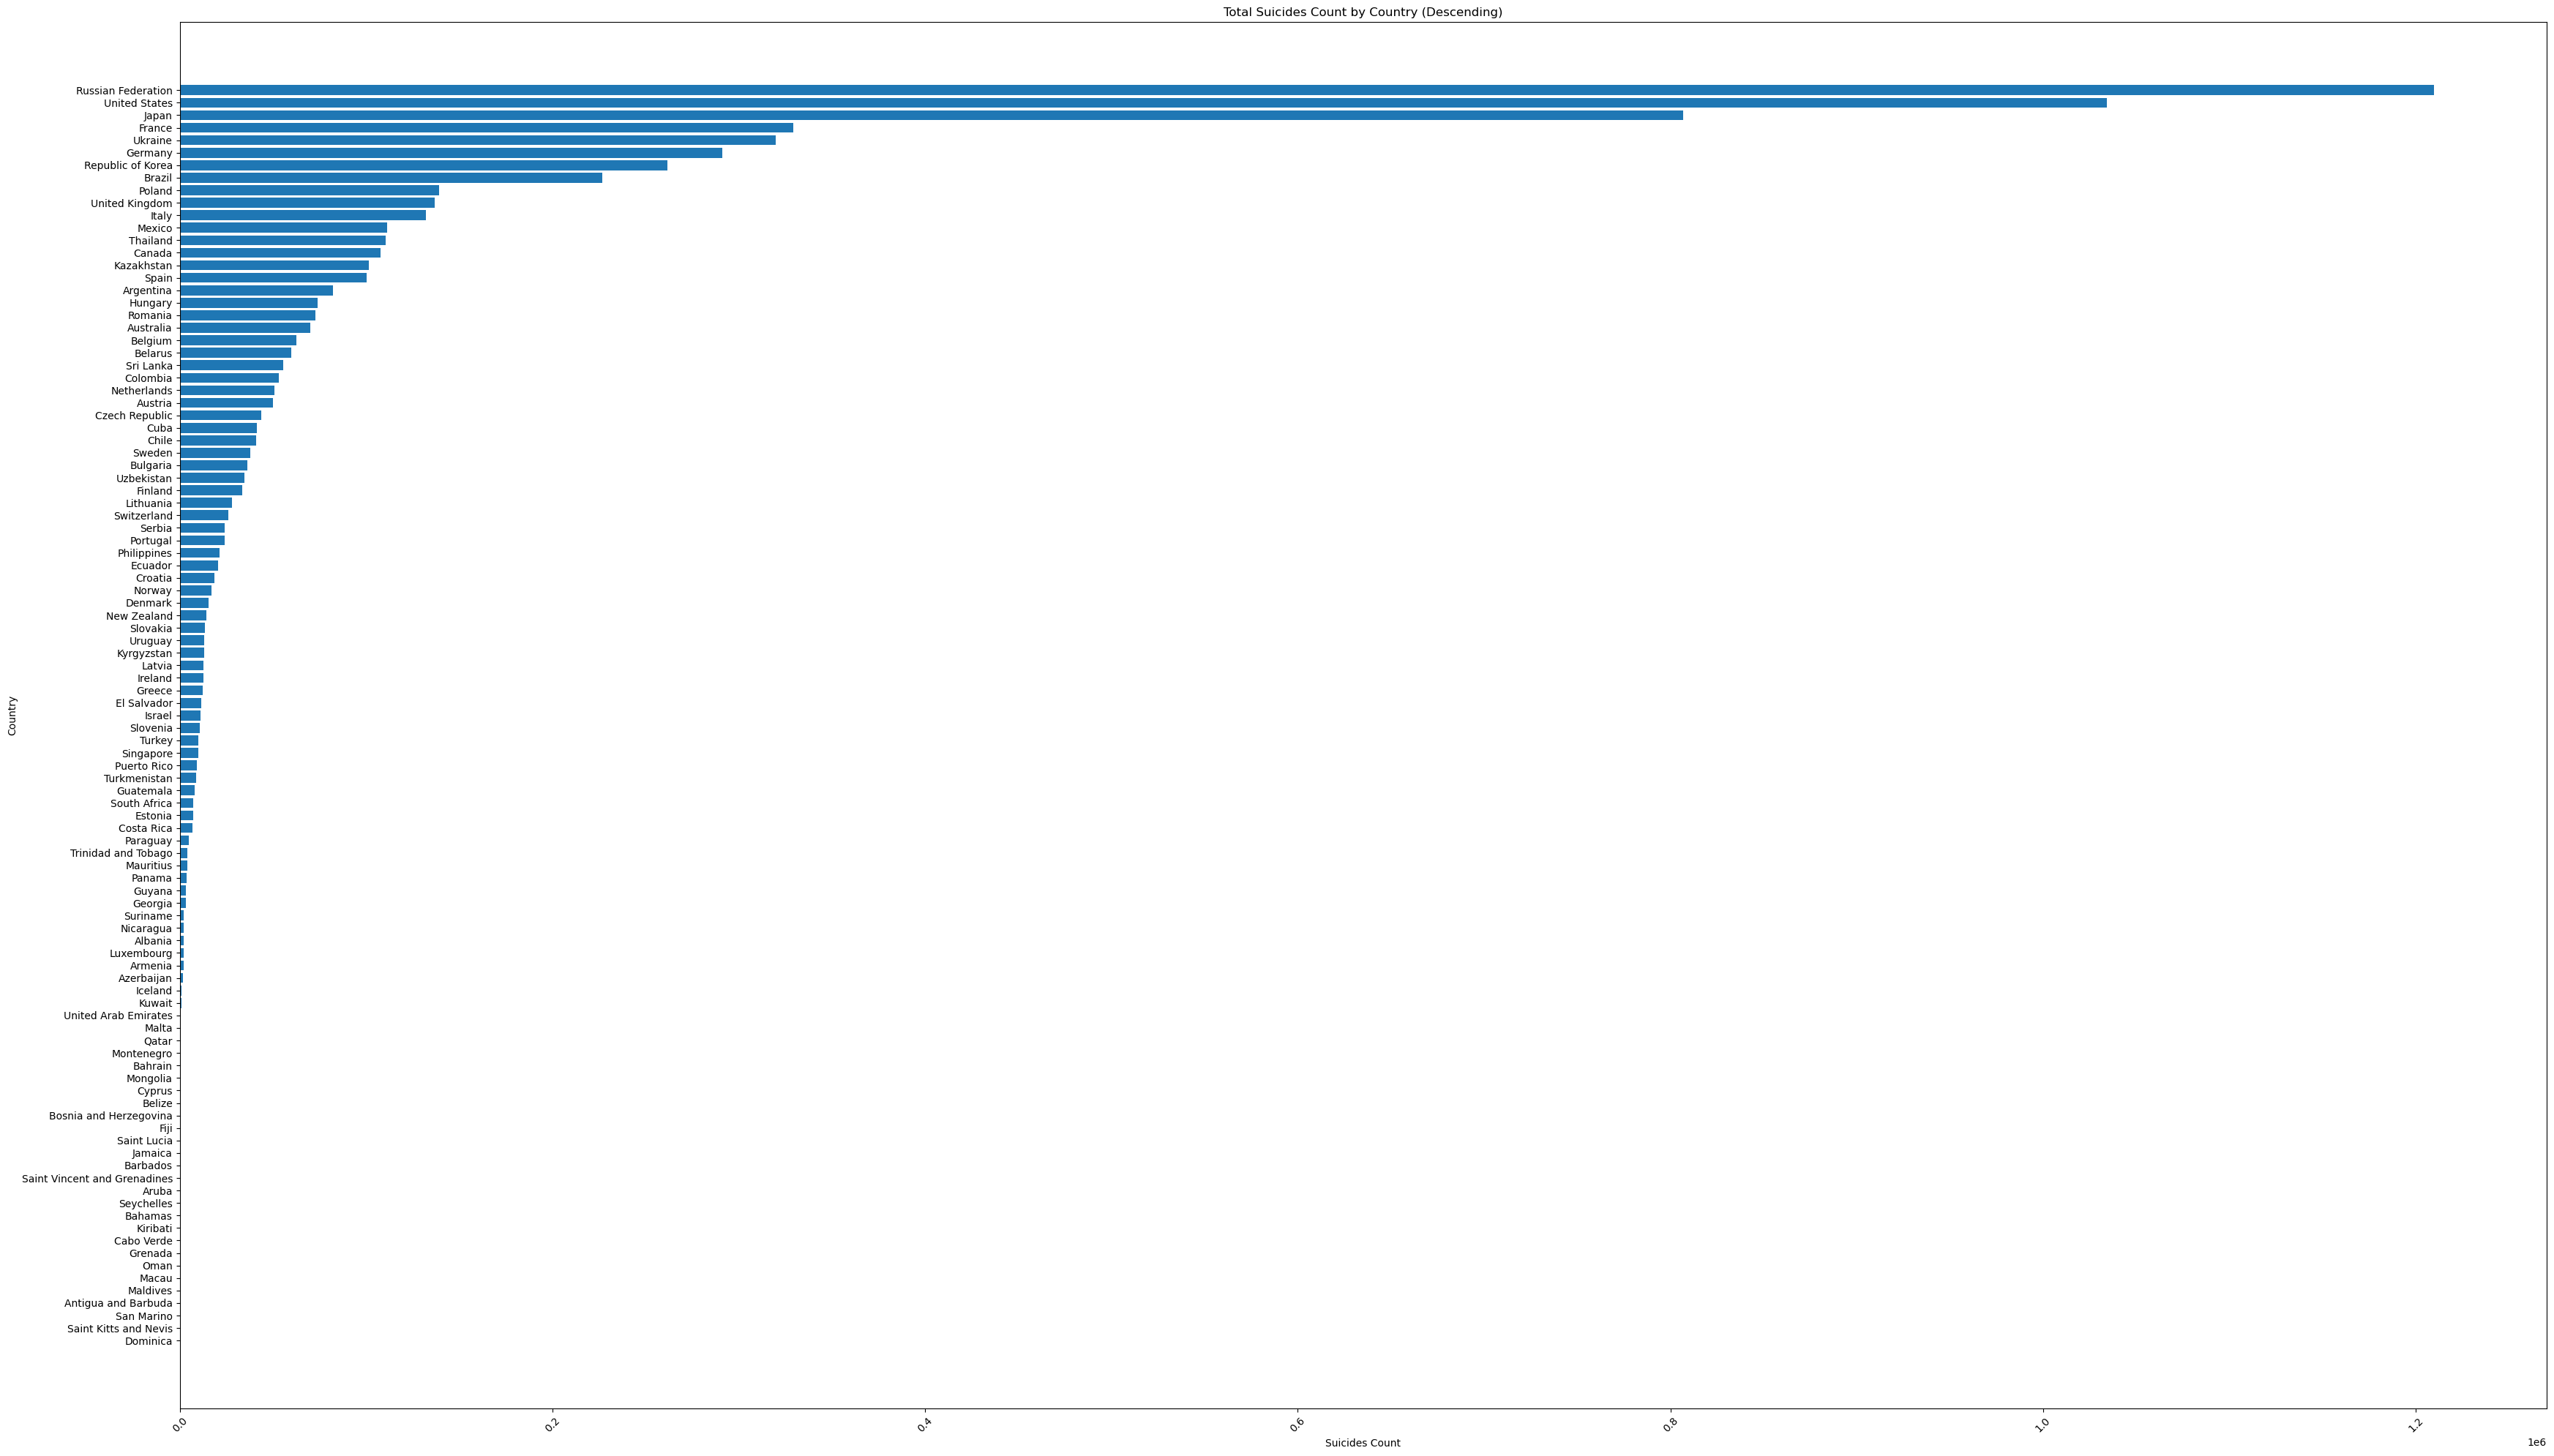

In [20]:
year_count_plot = year_count.sort_values(ascending=False)  # Sort by count (descending)

# Create the bar plot
plt.figure(figsize=(35, 20))  # Set the figure size
plt.barh(year_count_plot.index, year_count_plot.values)  # Horizontal bar chart
plt.xlabel('Suicides Count')
plt.ylabel('Country')
plt.title('Total Suicides Count by Country (Descending)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

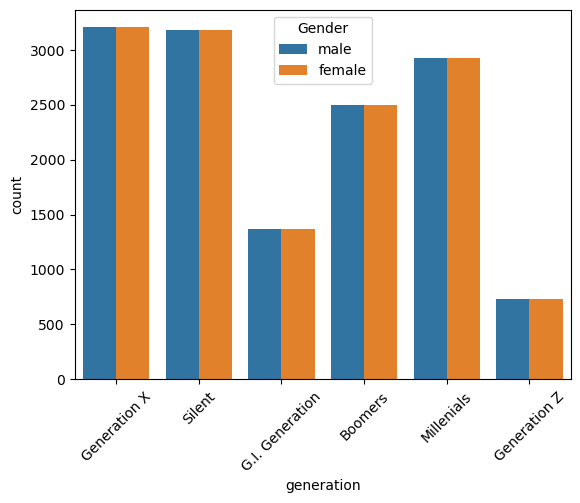

In [25]:
sns.countplot(x='generation',hue='Gender', data=df)
plt.xticks(rotation=45)
plt.show()

In [45]:
df=df.rename(columns={'gdp_per_capita ($)':'Gdp Capital'})

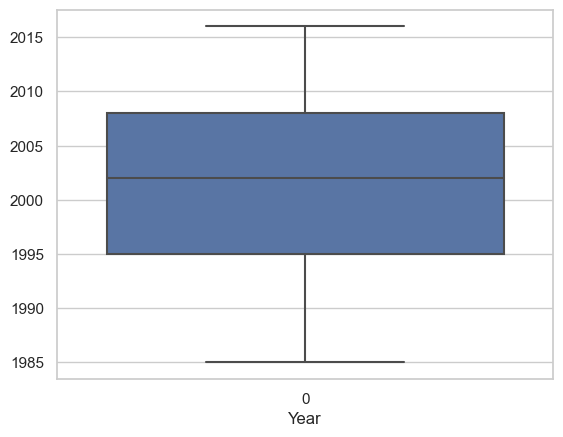

In [57]:
sns.set(style='whitegrid')
sns.boxplot(df.year)
plt.xlabel('Year')
plt.show()

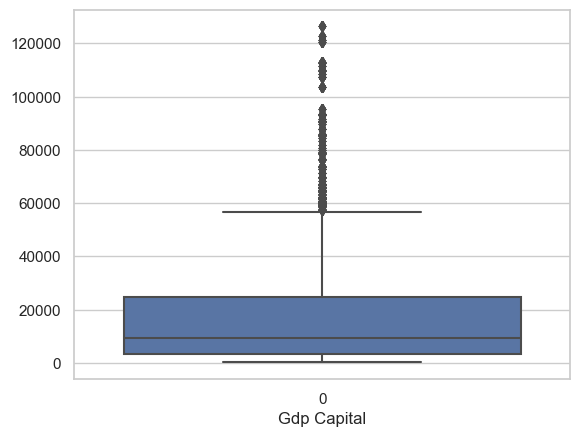

In [56]:
sns.set(style='whitegrid')
sns.boxplot(df['Gdp Capital'])
plt.xlabel('Gdp Capital')
plt.show()

In [61]:
max(df.suicides_count)
df[df.suicides_count==max((df.suicides_count))]

,country,year,Gender,age,suicides_count,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),Gdp Capital,generation,age_group
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.3,Russian Federation1994,NaN,"395,077,301,248",2853,Boomers,35-54


In [63]:
min(df.suicides_count)
df[df.suicides_count==min((df.suicides_count))]

,country,year,Gender,age,suicides_count,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),Gdp Capital,generation,age_group
9,Albania,1987,female,5-14 years,0,311000,0.0,Albania1987,NaN,"2,156,624,900",796,Generation X,5-14
10,Albania,1987,female,55-74 years,0,144600,0.0,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,55-74
11,Albania,1987,male,5-14 years,0,338200,0.0,Albania1987,NaN,"2,156,624,900",796,Generation X,5-14
22,Albania,1988,female,5-14 years,0,317200,0.0,Albania1988,NaN,"2,126,000,000",769,Generation X,5-14
23,Albania,1988,male,5-14 years,0,345000,0.0,Albania1988,NaN,"2,126,000,000",769,Generation X,5-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27363,Uruguay,1998,female,5-14 years,0,262973,0.0,Uruguay1998,NaN,"25,385,928,198",8420,Millenials,5-14
27459,Uruguay,2006,female,5-14 years,0,260187,0.0,Uruguay2006,NaN,"19,579,457,966",6362,Millenials,5-14
27471,Uruguay,2007,female,5-14 years,0,257931,0.0,Uruguay2007,NaN,"23,410,572,634",7581,Generation Z,5-14
27495,Uruguay,2009,male,5-14 years,0,263516,0.0,Uruguay2009,NaN,"31,660,911,277",10166,Generation Z,5-14


C:\Users\sathy\AppData\Local\Temp\ipykernel_25176\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


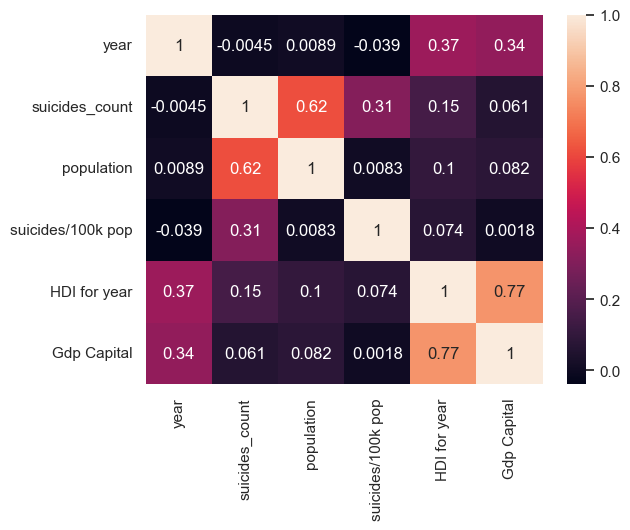

In [66]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# population and suicides count are highly correlated to each other